# Importing necessary modules

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [33]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max.columns', None)

# Loading the dataset and checking NULL values

In [34]:
filepath = r"/Users/sohomsen/Desktop/DataScience/Dataset/USA_Housing.csv"
dataset = pd.read_csv(filepath)
dataset.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."


In [35]:
dataset.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [64]:
dataset.shape

(5000, 6)

# Plotting the distribution curve

<AxesSubplot:xlabel='Avg. Area Income', ylabel='Density'>

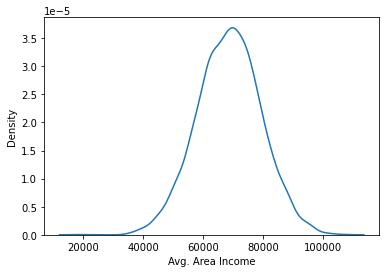

In [36]:
sns.distplot(dataset['Avg. Area Income'], hist=False)

<AxesSubplot:xlabel='Avg. Area House Age', ylabel='Density'>

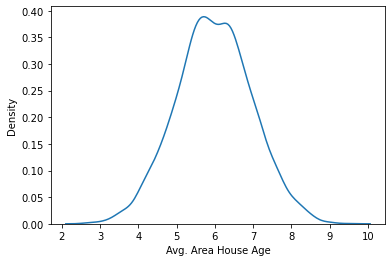

In [37]:
sns.distplot(dataset['Avg. Area House Age'], hist=False)

<AxesSubplot:xlabel='Avg. Area Number of Rooms', ylabel='Density'>

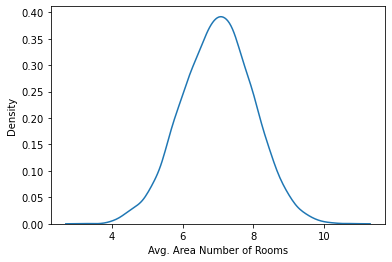

In [38]:
sns.distplot(dataset['Avg. Area Number of Rooms'], hist=False)

<AxesSubplot:xlabel='Avg. Area Number of Bedrooms', ylabel='Density'>

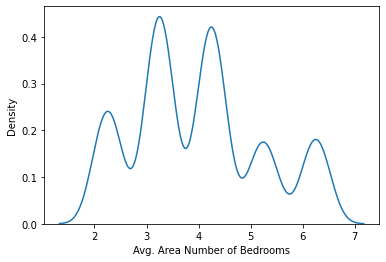

In [39]:
sns.distplot(dataset['Avg. Area Number of Bedrooms'], hist=False)

<AxesSubplot:xlabel='Area Population', ylabel='Density'>

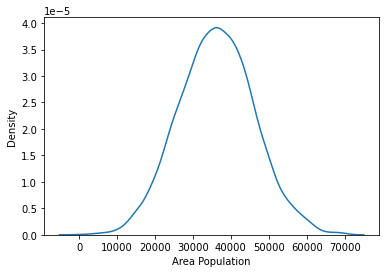

In [40]:
sns.distplot(dataset['Area Population'], hist=False)

<AxesSubplot:xlabel='Price', ylabel='Density'>

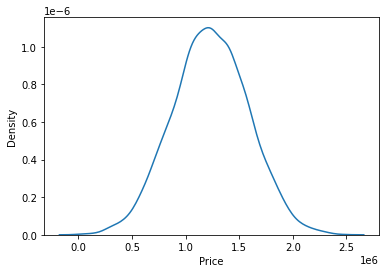

In [41]:
sns.distplot(dataset['Price'], hist=False)

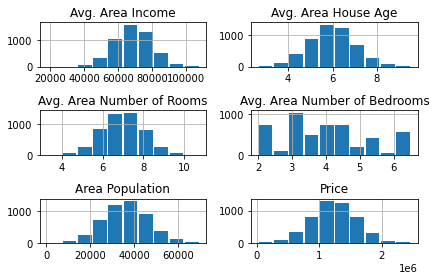

In [72]:
dataset.hist(rwidth=0.9)
plt.tight_layout()
plt.show()

# Skewness of the attributes

In [42]:
from scipy.stats import skew

In [43]:
dataset['Avg. Area Income'].skew()

-0.03371997540427538

In [44]:
dataset['Avg. Area House Age'].skew()

-0.007213872365817384

In [45]:
dataset['Avg. Area Number of Rooms'].skew()

-0.04099591018006094

In [46]:
dataset['Avg. Area Number of Bedrooms'].skew()

0.37624039721554303

In [47]:
dataset['Area Population'].skew()

0.05064968153215056

In [48]:
dataset['Price'].skew()

-0.002718064933559366

# Kurtosis of the attributes

In [76]:
from scipy.stats import kurtosis

In [78]:
dataset['Avg. Area Income'].kurtosis()

0.04557382127778986

In [79]:
dataset['Avg. Area House Age'].kurtosis()

-0.08343730111920777

In [80]:
dataset['Avg. Area Number of Rooms'].kurtosis()

-0.07465216626130733

In [81]:
dataset['Avg. Area Number of Bedrooms'].kurtosis()

-0.7015655650096422

In [82]:
dataset['Area Population'].kurtosis()

-0.006732919443474206

In [83]:
dataset['Price'].kurtosis()

-0.05491810893778171

In [49]:
# We see all the values of the skewness are very low, thus the distributions are very good and no need of alteration

### After the distribution Curve, we see that there are no such outliers present

In [50]:
# Dropping the Address column
dataset = dataset.drop(['Address'], axis=1)

# Using Standar Scaler

In [51]:
dataset.corr()['Price'].sort_values()

Avg. Area Number of Bedrooms    0.171071
Avg. Area Number of Rooms       0.335664
Area Population                 0.408556
Avg. Area House Age             0.452543
Avg. Area Income                0.639734
Price                           1.000000
Name: Price, dtype: float64

In [57]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
dataset2 = std.fit_transform(dataset)
dataset2 = pd.DataFrame(dataset2, columns=dataset.columns)

In [58]:
dataset2.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,1.028660,-0.296927,0.021274,0.088062,-1.317599,-0.490081
1,1.000808,0.025902,-0.255506,-0.722301,0.403999,0.775508


# Splitting the X and Y Values 

In [61]:
X = dataset2.iloc[:,0:5].values
X

array([[ 1.02865969, -0.29692705,  0.02127433,  0.08806222, -1.31759867],
       [ 1.00080775,  0.02590164, -0.25550611, -0.72230146,  0.40399945],
       [-0.68462916, -0.11230283,  1.5162435 ,  0.93084045,  0.07240989],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, -1.50025059, -0.29193658],
       [-0.05459152, -0.44669439,  0.14154061,  1.18205319,  0.65111608],
       [-0.28831272,  0.01521477, -0.19434166,  0.07185495,  1.04162464]])

In [62]:
Y = dataset2.iloc[:,5].values
Y

array([-0.49008146,  0.77550829, -0.49021053, ..., -0.570244  ,
       -0.0946402 ,  0.18941143])

# Train_Test_Split and Regression

In [63]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
LG = LinearRegression()

In [68]:
LG.fit(X_train, Y_train)

LinearRegression()

In [69]:
Y_pred = LG.predict(X_test)

# R2 Score of the Model

In [70]:
from sklearn.metrics import r2_score

In [73]:
r2 = r2_score(Y_test, Y_pred)
r2

0.9169678829262494

# Slope and Intercept

In [74]:
LG.coef_

array([0.65337226, 0.46382523, 0.34010609, 0.0072911 , 0.42756528])

In [75]:
LG.intercept_

-0.001895448770443558